<a href="https://colab.research.google.com/github/yahyaAboamer/House-prices-prediction/blob/master/House_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras-tuner  # Install Keras Tuner if not installed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt  # For hyperparameter tuning


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import sklearn.datasets



In [ ]:
results = []

def store_results(model_name, r2, mae):
    results.append({'Model': model_name, 'R² Score': r2, 'MAE': mae})

In [ ]:
import sklearn.datasets

# Importing Model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin

# Library used for data handling
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
house_price_dataframe.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
y=house_price_dataframe['price']
y

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
x=house_price_dataframe.drop('price',axis=1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
house_price_dataframe.describe(include='all').round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
for i in house_price_dataframe.columns.tolist():
    print("No of unique Values in", i ,"is", house_price_dataframe[i].nunique())

No of unique Values in MedInc is 12928
No of unique Values in HouseAge is 52
No of unique Values in AveRooms is 19392
No of unique Values in AveBedrms is 14233
No of unique Values in Population is 3888
No of unique Values in AveOccup is 18841
No of unique Values in Latitude is 862
No of unique Values in Longitude is 844
No of unique Values in price is 3842


In [ ]:
print("Number of rows are: ",house_price_dataframe.shape[0])
print("Number of columns are: ",house_price_dataframe.shape[1])

Number of rows are:  20640
Number of columns are:  9


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98
...,...,...,...,...,...,...,...,...
554,2.8750,52.0,3.874214,1.004193,921.0,1.930818,37.77,-122.26
12092,4.2273,13.0,7.205438,1.084592,1985.0,2.998489,33.81,-117.43
2284,2.1383,30.0,4.997549,1.086601,2768.0,2.261438,36.78,-119.76
14554,6.3721,12.0,7.617157,1.023047,2936.0,3.759283,32.96,-117.14


In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(20640, 8) (15480, 8) (5160, 8)


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = model.predict(x_train)

In [ ]:
print(training_data_prediction)

[2.527071  0.6174013 1.1158092 ... 1.8347801 1.7563723 0.7643776]


In [ ]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R Squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.9492539821379308
Mean Absolute Error:  0.1839837107124914


In [ ]:
store_results("XGBoost", score_1, score_2)  # Use your computed R² and MAE

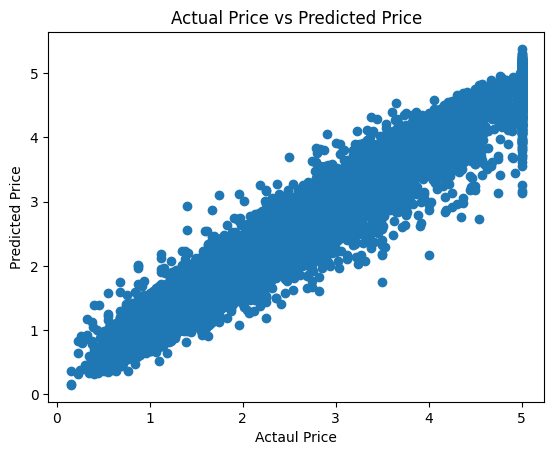

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actaul Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
# Load California housing dataset
house_price_dataset = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
df['Target'] = house_price_dataset.target

# Split features and target
x = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4014 - mae: 0.8166 - val_loss: 0.5225 - val_mae: 0.4948
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5534 - mae: 0.4566 - val_loss: 0.3916 - val_mae: 0.4436
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3757 - mae: 0.4304 - val_loss: 0.3768 - val_mae: 0.4364
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3411 - mae: 0.4095 - val_loss: 0.3807 - val_mae: 0.4428
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3214 - mae: 0.3988 - val_loss: 0.3488 - val_mae: 0.4089
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3126 - mae: 0.3929 - val_loss: 0.3323 - val_mae: 0.3943
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3069 - mae: 0.3836 - val_loss: 0.3218 - val_mae: 0.3919
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2936 - mae: 0.3742 - val_loss: 0.3408 - val_mae: 0.3965
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/

In [ ]:
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"Test MAE: {test_mae:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2747 - mae: 0.3577  
Test MAE: 0.3593


In [ ]:
store_results("Neural Network", r2, test_mae)  # Use evaluation results

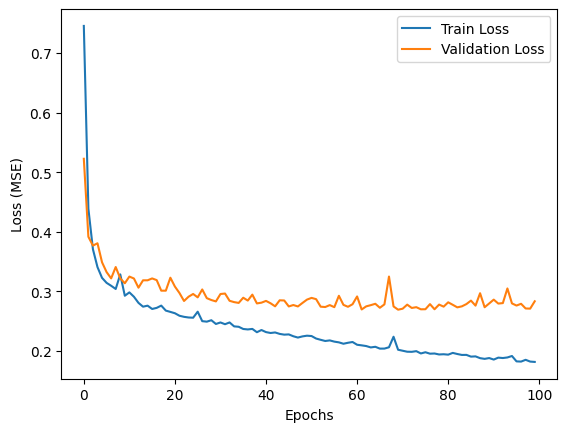

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=16),
                    activation=hp.Choice('activation_1', ['relu', 'tanh', 'leaky_relu']),
                    input_shape=(x_train_scaled.shape[1],)))

    # Optional Batch Normalization
    if hp.Boolean('batch_norm_1'):
        model.add(BatchNormalization())

    # Hidden layers (1-3 layers)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=16),
                        activation=hp.Choice(f'activation_{i+2}', ['relu', 'tanh', 'leaky_relu'])))

        # Optional Dropout
        if hp.Boolean(f'dropout_{i+2}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

        # Optional Batch Normalization
        if hp.Boolean(f'batch_norm_{i+2}'):
            model.add(BatchNormalization())

    # Output layer (regression task)
    model.add(Dense(1))

    # Compile model with tunable learning rate
    model.compile(optimizer=Adam(hp.Float('learning_rate', 0.0001, 0.01, sampling='log')),
                  loss='mse', metrics=['mae'])

    return model

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'gamma': ['scale'],
    'epsilon': [0.1]
}


In [ ]:
grid_search = HalvingGridSearchCV(SVR(), param_grid, factor=2, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

HalvingGridSearchCV(cv=3, estimator=SVR(), factor=2, n_jobs=-1,
                    param_grid={'C': [1, 10], 'epsilon': [0.1],
                                'gamma': ['scale'], 'kernel': ['rbf']},
                    scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
training_data_prediction = best_model.predict(x_train)

In [ ]:
# Evaluate the model
r2 = r2_score(y_train, training_data_prediction)
mae = mean_absolute_error(y_train, training_data_prediction)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print("R Squared Error:", r2)
print("Mean Absolute Error:", mae)

Best Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
R Squared Error: 0.7793080886813665
Mean Absolute Error: 0.35517874859458043


In [ ]:
store_results("SVR with Grid Search", r2, mae)  # Use computed metrics

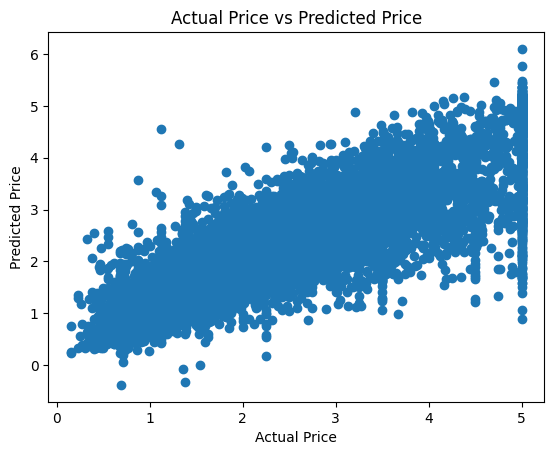

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

                  Model  R² Score       MAE
0               XGBoost  0.949254  0.183984
1        Neural Network  0.779308  0.359281
2  SVR with Grid Search  0.779308  0.355179


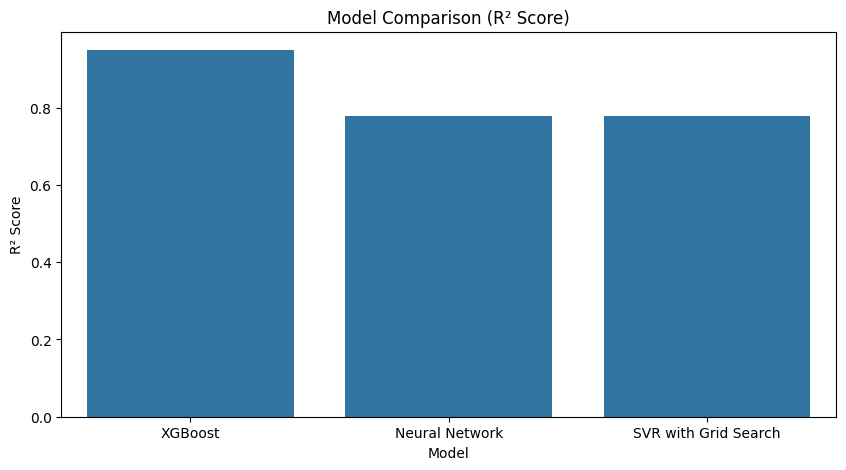

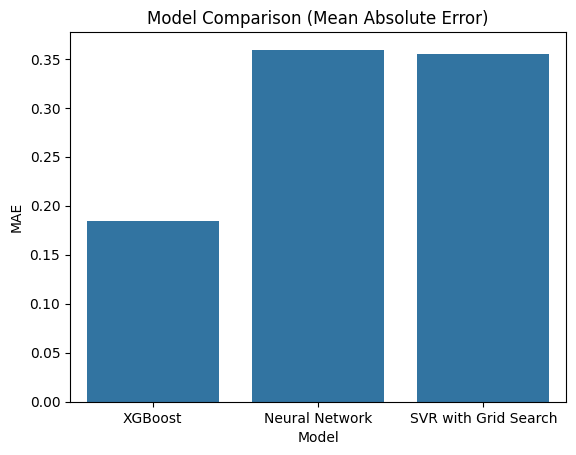

In [ ]:
# Display model performance
results_df = pd.DataFrame(results)
print(results_df)

# Visualize model comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Comparison (R² Score)')
plt.show()

sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Model Comparison (Mean Absolute Error)')
plt.show()